In [1]:
import pandas as pd
from umap import UMAP
from twilite.preprocessing import SparseMatrix
from twilite.transformation import MatrixFactorization
from twilite.model_tuning import GridSearch, Model
from twilite.database import Storage
from twilite.pipeline import Pipeline
from twilite.utils import feature
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import json

In [9]:
creds = json.load(open("creds.json"))
db = Storage(creds=creds, db='blm2')
db.create_all()

In [24]:
hashtag_user = Pipeline(
    feature='ht_user',
    preprocess=SparseMatrix(filter_function=feature, user_num=5, ft_freq=50, ft_num=3),
    transform=MatrixFactorization(scaler=StandardScaler(), mapper=UMAP(n_components=2)),
    evaluate=GridSearch(models=[Model(model=KMeans, eval_range=range(2,10))], metric=silhouette_score),
    database=db
)

user_hashtag = Pipeline(
    feature='user_ht',
    preprocess=SparseMatrix(filter_function=feature, user_num=5, ft_freq=50, ft_num=3),
    transform=MatrixFactorization(scaler=StandardScaler(), mapper=UMAP(n_components=2)),
    evaluate=GridSearch(models=[Model(model=KMeans, eval_range=range(2,10))], metric=silhouette_score),
    database=db
)

retweeted_userid = Pipeline(
    feature='user_rt_uid', 
    preprocess=SparseMatrix(filter_function=feature, user_num=10, ft_freq=100),
    transform=MatrixFactorization(scaler=StandardScaler(), mapper=UMAP(n_components=2)),
    evaluate=GridSearch(models=[Model(model=KMeans, eval_range=range(2,10))], metric=silhouette_score),
    database=db
)

retweeted_tweetid = Pipeline(
    feature='user_rt_tid', 
    preprocess=SparseMatrix(filter_function=feature, user_num=10, ft_freq=50),
    transform=MatrixFactorization(scaler=StandardScaler(), mapper=UMAP(n_components=2)),
    evaluate=GridSearch(models=[Model(model=KMeans, eval_range=range(2,10))], metric=silhouette_score),
    database=db
)

In [16]:
hashtag_user.run()

[ETL 1/4] COMPLETE .......... PREPROCESS, TOTAL TIME=  10.5s
[ETL 2/4] COMPLETE ...... TRANSFORMATION, TOTAL TIME=   0.7s
[ETL 3/4] COMPLETE .... MODEL EVALUATION, TOTAL TIME=   0.1s
[ETL 4/4] COMPLETE ........... LOAD DATA, TOTAL TIME=   0.8s
PROCESS COMPLETE ...................... , TOTAL TIME=  12.1s


In [25]:
user_hashtag.run()

[ETL 1/4] COMPLETE .......... PREPROCESS, TOTAL TIME=  10.4s
[ETL 2/4] COMPLETE ...... TRANSFORMATION, TOTAL TIME=   3.4s
[ETL 3/4] COMPLETE .... MODEL EVALUATION, TOTAL TIME=   0.8s
[ETL 4/4] COMPLETE ........... LOAD DATA, TOTAL TIME=  12.5s
PROCESS COMPLETE ...................... , TOTAL TIME=  27.2s


In [18]:
retweeted_userid.run()

[ETL 1/4] COMPLETE .......... PREPROCESS, TOTAL TIME=   8.9s
[ETL 2/4] COMPLETE ...... TRANSFORMATION, TOTAL TIME=  10.8s
[ETL 3/4] COMPLETE .... MODEL EVALUATION, TOTAL TIME=   2.4s
[ETL 4/4] COMPLETE ........... LOAD DATA, TOTAL TIME=  30.5s
PROCESS COMPLETE ...................... , TOTAL TIME=  52.5s


In [19]:
retweeted_tweetid.run()

[ETL 1/4] COMPLETE .......... PREPROCESS, TOTAL TIME=   8.8s
[ETL 2/4] COMPLETE ...... TRANSFORMATION, TOTAL TIME=  16.8s
[ETL 3/4] COMPLETE .... MODEL EVALUATION, TOTAL TIME=   3.8s
[ETL 4/4] COMPLETE ........... LOAD DATA, TOTAL TIME=  40.7s
PROCESS COMPLETE ...................... , TOTAL TIME= 1.2min


<AxesSubplot:xlabel='xcord', ylabel='ycord'>

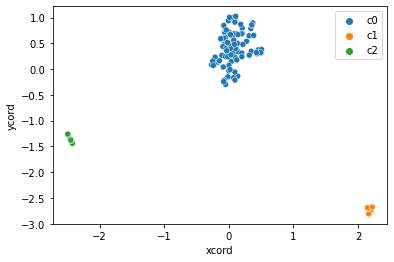

In [20]:
hashtag_user.scatter_plot()

<AxesSubplot:xlabel='xcord', ylabel='ycord'>

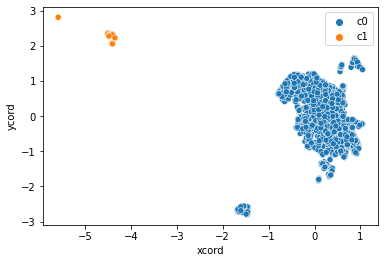

In [26]:
user_hashtag.scatter_plot()

<AxesSubplot:xlabel='xcord', ylabel='ycord'>

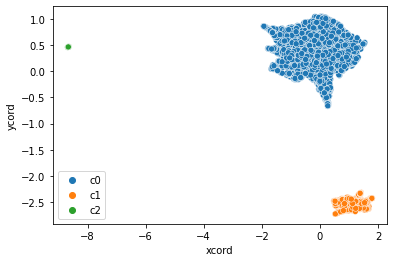

In [22]:
retweeted_userid.scatter_plot()

<AxesSubplot:xlabel='xcord', ylabel='ycord'>

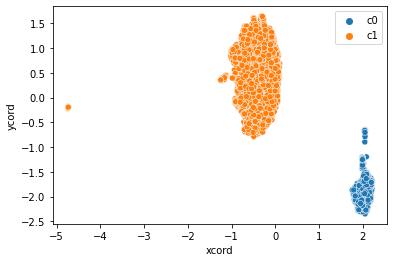

In [23]:
retweeted_tweetid.scatter_plot()